# Equipartition Surface Magnetic Field Strengths

Computing equipartition magnetic field strengths using PHOENIX stellar atmosphere models (Hauschildt et al. 1999). 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as scint

We need to import a file with stellar parameters and a table of stellar atmosphere properties in photospheric layers. We approximate the surface equipartition magnetic field strength as the equipartition field strength where the magnetic pressure is equal the gas pressure at a Rossland optical depth $\tau = 1$. This is roughly equivalent to the equipartition field strength in the optical photospheric layers. Stellar parameters will be taken from a non-magnetic stellar model isochrone at an age of 10 Myr.

Start by importing stellar parameters,

In [2]:
iso = np.genfromtxt('../models/iso/std/dmestar_00010.0myr_z+0.00_a+0.00_phx.iso')

Now load a table with the atmospheric gas pressure and temperature at an optical depth $\tau = 1$ for a set of $\log(g)$s and $T_{\rm eff}$s. We'll adopt a solar metallicity to simplify things.

In [3]:
atm = np.genfromtxt('../models/atm/tab/Zp0d0.ap0d0_t001.dat')

Values for the effective temperature of the atmosphere model is tabulated in column 0, but we must define an array with $\log(g)$ values. 

In [4]:
teffs = np.transpose(atm[:, 0])
loggs = np.arange(-0.5, 5.6, 0.5)
print teffs
print loggs

[  2000.   2100.   2200.   2300.   2400.   2500.   2600.   2700.   2800.
   2900.   3000.   3100.   3200.   3300.   3400.   3500.   3600.   3700.
   3800.   3900.   4000.   4100.   4200.   4300.   4400.   4500.   4600.
   4700.   4800.   4900.   5000.   5100.   5200.   5300.   5400.   5500.
   5600.   5700.   5800.   5900.   6000.   6100.   6200.   6300.   6400.
   6500.   6600.   6700.   6800.   6900.   7000.   7200.   7400.   7600.
   7800.   8000.   8200.   8400.   8600.   8800.   9000.   9200.   9400.
   9600.   9800.  10000.]
[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


The atmosphere structure table isn't quite in the correct form for our purposes, as pressures and temperatures are intermingled. We should separate those properties into individual pressure and temperature tables. 

In [5]:
temps = np.empty((len(teffs), len(loggs)))
press = np.empty((len(teffs), len(loggs)))
for i, teff in enumerate(atm[:, 1:]):
    for j, prop in enumerate(teff):
        if prop == 0.:
            prop = np.nan
        else:
            pass
        
        if j%2 == 0:
            press[i, j/2] = prop
        else:
            temps[i, j/2] = prop

With the individual tables formed, we now need to construct interpolation surfaces using a 2D interpolation routine. Note that we only really care about the pressure table, as that sets the equipartition magnetic field strengths.

In [6]:
pres_surface = scint.interp2d(teffs, loggs, np.transpose(press), kind='linear')

We are in a position to compute surface pressures and, by extension, equipartition magnetic field strengths.

In [7]:
B_eq = np.empty((len(iso[:62])))
for i, star in enumerate(iso[:62]):
    B_eq[i] = np.sqrt(8.0*np.pi*pres_surface(10**star[1], star[2]))

See what kind of values we obtain.

In [8]:
B_eq

array([ 2659.92565719,  2640.8762066 ,  2601.39409537,  2574.47287392,
        2547.52813018,  2520.41264397,  2512.39338917,  2497.871942  ,
        2475.89718709,  2464.61361199,  2454.09346119,  2444.28825026,
        2436.50517283,  2429.33381733,  2422.31212487,  2415.37789075,
        2408.91931469,  2402.70451673,  2396.51867784,  2390.27898429,
        2383.96405908,  2377.17793796,  2369.57127293,  2361.28871528,
        2352.8630523 ,  2344.42180454,  2335.80944144,  2326.89073425,
        2317.72156231,  2308.48104173,  2298.43057873,  2287.54247666,
        2275.92910244,  2263.71029116,  2250.66726014,  2236.73540779,
        2219.96534634,  2205.60102733,  2190.21910703,  2175.1489264 ,
        2159.49085786,  2142.7275601 ,  2124.20463775,  2104.35839583,
        2083.00137978,  2060.78209034,  2036.6275872 ,  2012.22178199,
        1975.49516405,  1920.34829018,  1871.2147127 ,  1828.30590997,
        1784.26246206,  1731.48098138,  1665.36385977,  1575.25812772,
      

These values match estimates from convective energy equiparition and observational measurements (e.g., Saar). There is a general trend that equipartition field strengths decrease toward higher masses/temperatures, which matches intuition since surface gas pressures decrease as stellar surface layers become more extended and fluffy.

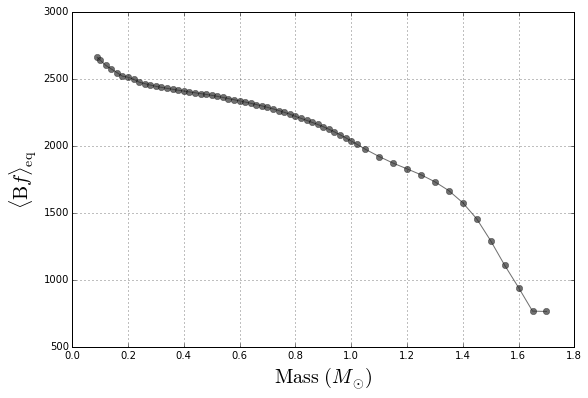

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(9., 6.))

ax.set_xlabel('${\\rm Mass}\ (M_{\\odot})$', fontsize=20)
ax.set_ylabel('$\\langle {\\rm B}f \\rangle_{\\rm eq}$', fontsize=20)
ax.grid()

ax.plot(iso[:62, 0], B_eq, 'o-', lw=1, color='#333333', alpha=0.7)